AIR QUALITY INDEX(AQI) ANALYSIS IN DELHI

The dataset (delhiaqi.csv) contains 561 rows and 9 columns, which include:

1. date (timestamp)
2. Pollutants:
    co (Carbon Monoxide),
    no (Nitric Oxide),
    no2 (Nitrogen Dioxide),
    o3 (Ozone),
    so2 (Sulfur Dioxide),
    pm2_5 (Particulate Matter ≤2.5 µm),
    pm10 (Particulate Matter ≤10 µm),
    nh3 (Ammonia)

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv("C:/Users/megha/OneDrive/Desktop/Shadowfox Data Science Internship/delhiaqi.csv")

In [3]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [4]:
#Check for missing values
print(df.isnull().sum())

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [5]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Count zero values in each column
zero_counts = (df == 0).sum()

# Print the count of zero values
print(zero_counts)

date       0
co         0
no        35
no2        0
o3       109
so2        0
pm2_5      0
pm10       0
nh3        0
dtype: int64


In [7]:
# Replace 0 values in 'no' and 'o3' with NaN (assuming missing data)
df.replace({'no': 0, 'o3': 0}, np.nan, inplace=True)

# Check for missing values
print(df.isnull().sum())

date       0
co         0
no        35
no2        0
o3       109
so2        0
pm2_5      0
pm10       0
nh3        0
dtype: int64


In [8]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [9]:
print(df.describe())

                      date            co          no         no2          o3  \
count                  561    561.000000  526.000000  561.000000  452.000000   
mean   2023-01-12 16:00:00   3814.942210   54.587624   75.292496   37.410686   
min    2023-01-01 00:00:00    654.220000    0.010000   13.370000    0.010000   
25%    2023-01-06 20:00:00   1708.980000    4.920000   44.550000    2.257500   
50%    2023-01-12 16:00:00   2590.180000   15.310000   63.750000   21.725000   
75%    2023-01-18 12:00:00   4432.680000   64.147500   97.330000   57.400000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   85.574714   42.473791   41.377765   

              so2        pm2_5         pm10         nh3  
count  561.000000   561.000000   561.000000  561.000000  
mean    64.655936   358.256364   420.988414   26.425062  
min      5.250000    60.100000    69.080000    0.630000  
25%     28.130000   204.450000   240.900000    

In [10]:
#Compute AQI for Each Pollutant AQI is calculated based on sub-indices for pollutants using Central Pollution Control Board (CPCB) India standards.
def compute_aqi(value, breakpoints):
    """
    Computes AQI using linear interpolation between breakpoints.
    """
    for i in range(len(breakpoints) - 1):
        low_bp, high_bp, low_aqi, high_aqi = breakpoints[i][0], breakpoints[i][1], breakpoints[i][2], breakpoints[i+1][2]
        if low_bp <= value <= high_bp:
            # Linear interpolation formula
            return np.interp(value, [low_bp, high_bp], [low_aqi, high_aqi])
    return 500  # Max AQI if exceeds limits

# Define breakpoints (with proper AQI scale)
breakpoints = {
    "pm2_5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
    "pm10": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)],
    "no2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)],
    "so2": [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), (381, 800, 201, 300), (801, 1600, 301, 400), (1601, 2000, 401, 500)],
    "co": [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    "o3": [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)]
}

# Convert CO values to mg/m³ if needed (divide by 1000)
df['co'] = df['co'] / 1000

# Compute AQI for each pollutant
for pollutant in ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']:
    df[f'AQI_{pollutant}'] = df[pollutant].apply(lambda x: compute_aqi(x, breakpoints[pollutant]))

# Final AQI = Max AQI among all pollutants
df['AQI'] = df[[f'AQI_{p}' for p in ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']]].max(axis=1)

df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI_pm2_5,AQI_pm10,AQI_no2,AQI_so2,AQI_co,AQI_o3,AQI
0,2023-01-01 00:00:00,1.65558,1.66,39.41,5.90,17.88,169.29,194.64,5.83,338.434109,163.845638,50.247750,22.79700,81.865556,6.0180,338.434109
1,2023-01-01 01:00:00,1.86920,6.82,42.16,1.99,22.17,182.84,211.08,7.66,348.937984,174.879195,52.487179,28.26675,93.733333,2.0298,348.937984
2,2023-01-01 02:00:00,2.51007,27.72,43.87,0.02,30.04,220.25,260.68,11.40,377.937984,210.777778,54.679487,38.30100,106.190759,0.0204,377.937984
3,2023-01-01 03:00:00,3.15094,55.43,44.55,0.85,35.76,252.90,304.12,13.55,500.000000,254.656566,55.551282,45.59400,114.303038,0.8670,500.000000
4,2023-01-01 04:00:00,3.47137,68.84,45.24,5.45,39.10,266.36,322.80,14.19,500.000000,273.525253,56.435897,49.85250,118.359114,5.5590,500.000000


In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\megha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\megha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


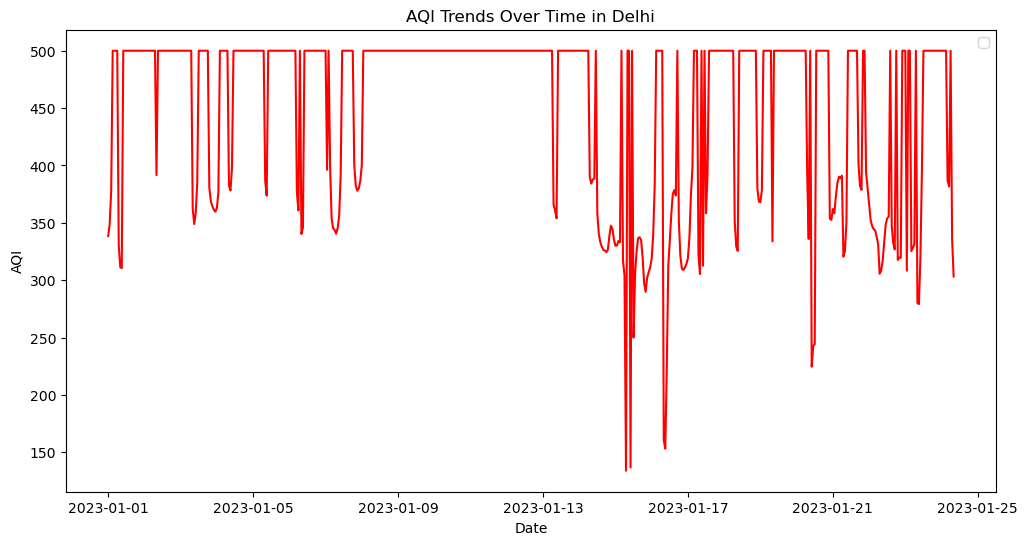

In [12]:
#AQI Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='AQI', color='red')
plt.title("AQI Trends Over Time in Delhi")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()

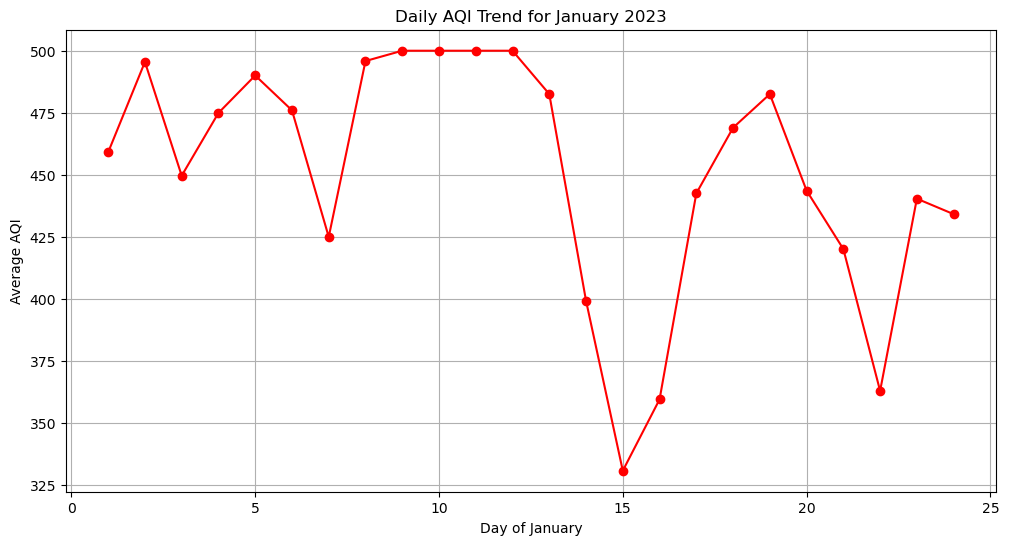

In [13]:
df['day'] = df['date'].dt.day 

daily_avg_aqi = df.groupby('day')['AQI'].mean() 

plt.figure(figsize=(12,6))
plt.plot(daily_avg_aqi.index, daily_avg_aqi.values, marker='o', color='red')
plt.xlabel('Day of January')
plt.ylabel('Average AQI')
plt.title('Daily AQI Trend for January 2023')
plt.grid()
plt.show()

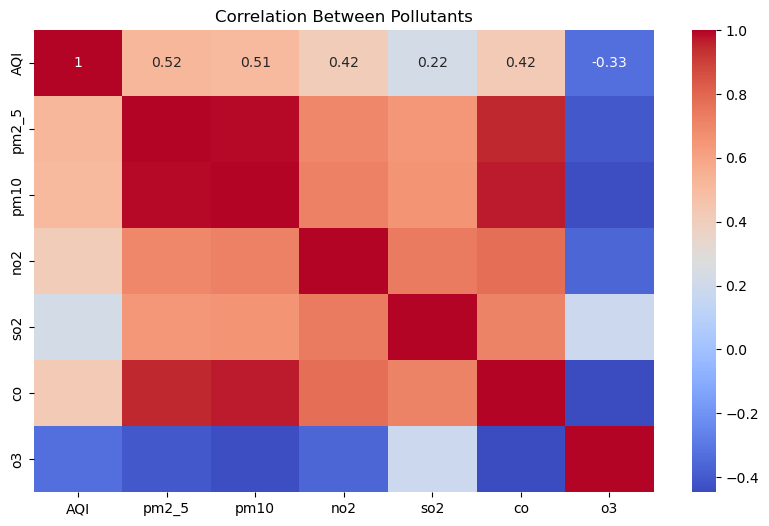

In [14]:
#Correlation Between Pollutants
plt.figure(figsize=(10, 6))
sns.heatmap(df[['AQI', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.show()

C:\Users\megha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


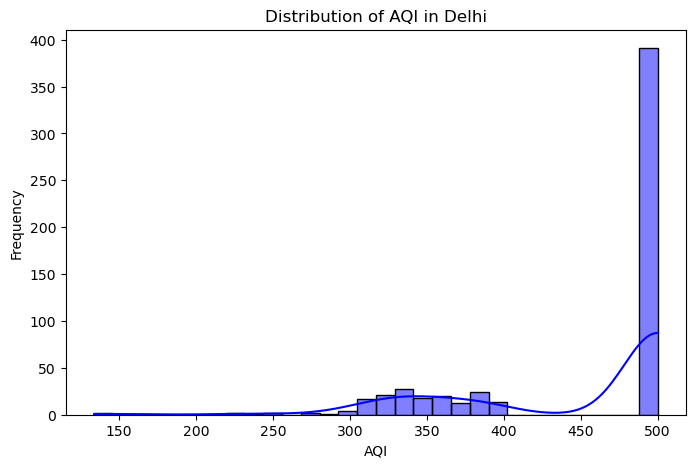

In [15]:
# Distribution of AQI values
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI in Delhi')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

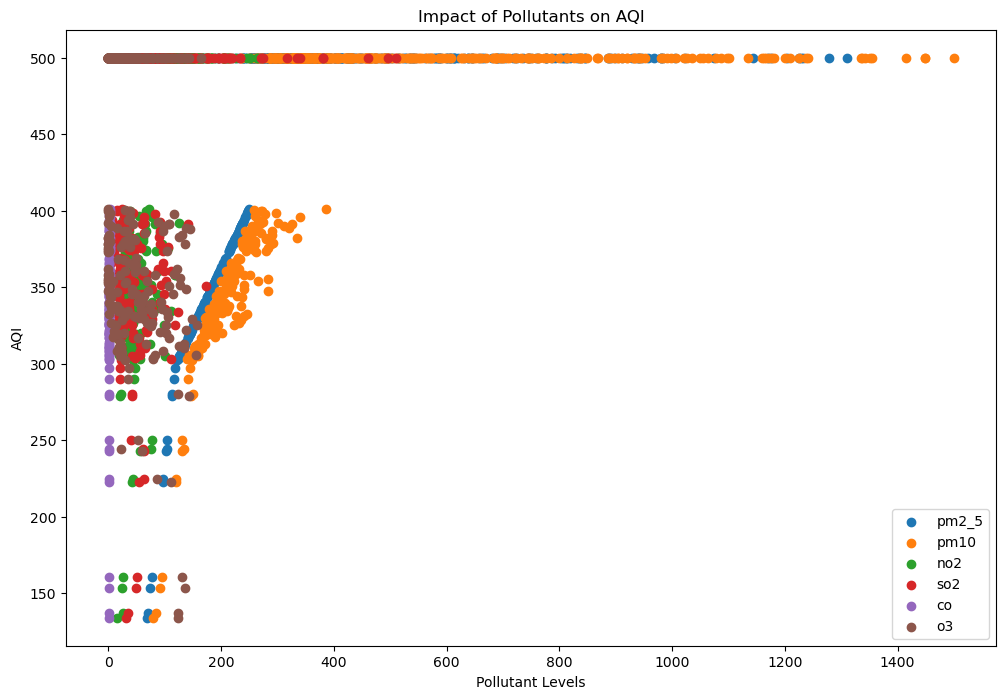

In [16]:
# Analyze the impact of key pollutants
pollutants = breakpoints.keys()
plt.figure(figsize=(12,8))
for pollutant in pollutants:
    if pollutant in df.columns:
        plt.scatter(df[pollutant], df['AQI'], label=pollutant)
plt.xlabel('Pollutant Levels')
plt.ylabel('AQI')
plt.title('Impact of Pollutants on AQI')
plt.legend()
plt.show()

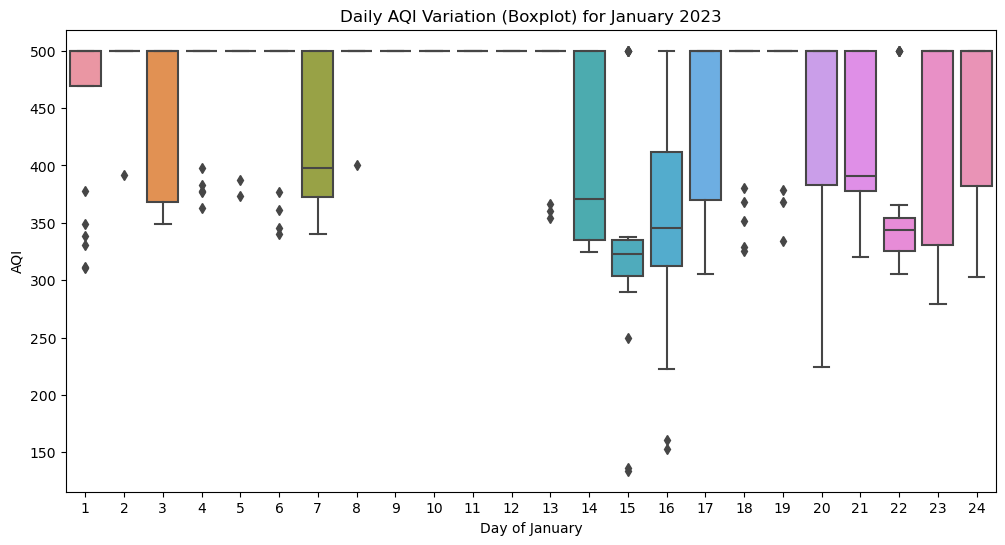

In [17]:
df['day'] = df['date'].dt.day
plt.figure(figsize=(12,6))
sns.boxplot(x='day', y='AQI', data=df)
plt.title('Daily AQI Variation (Boxplot) for January 2023')
plt.xlabel('Day of January')
plt.ylabel('AQI')
plt.show()

C:\Users\megha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


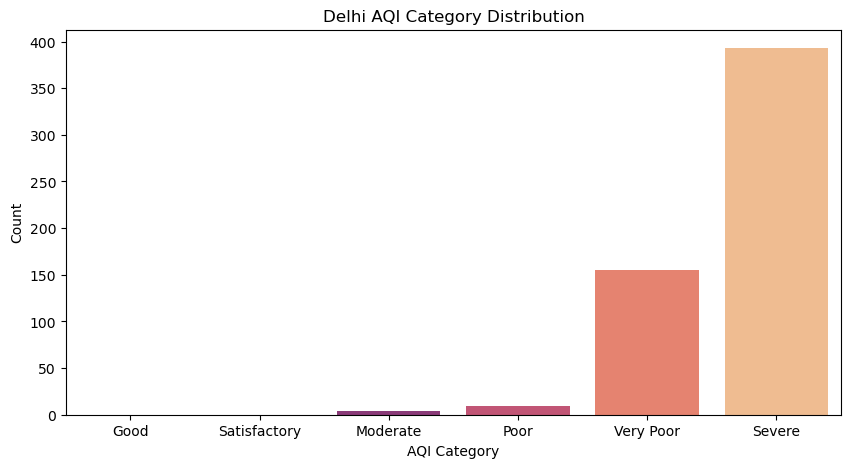

In [18]:
#AQI Category Distribution
aqi_categories = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]
bins = [0, 50, 100, 200, 300, 400, 500]

df['AQI_Category'] = pd.cut(df['AQI'], bins=bins, labels=aqi_categories)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='AQI_Category', palette='magma')
plt.title("Delhi AQI Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

In [19]:
# Save processed dataset
df.to_csv("/Users/megha/OneDrive/Desktop/Shadowfox Data Science Internship/processed_delhiaqi.csv", index=False)